In [1]:
import matplotlib.pyplot as plt
import numpy as np
from time import sleep
from IPython.display import clear_output


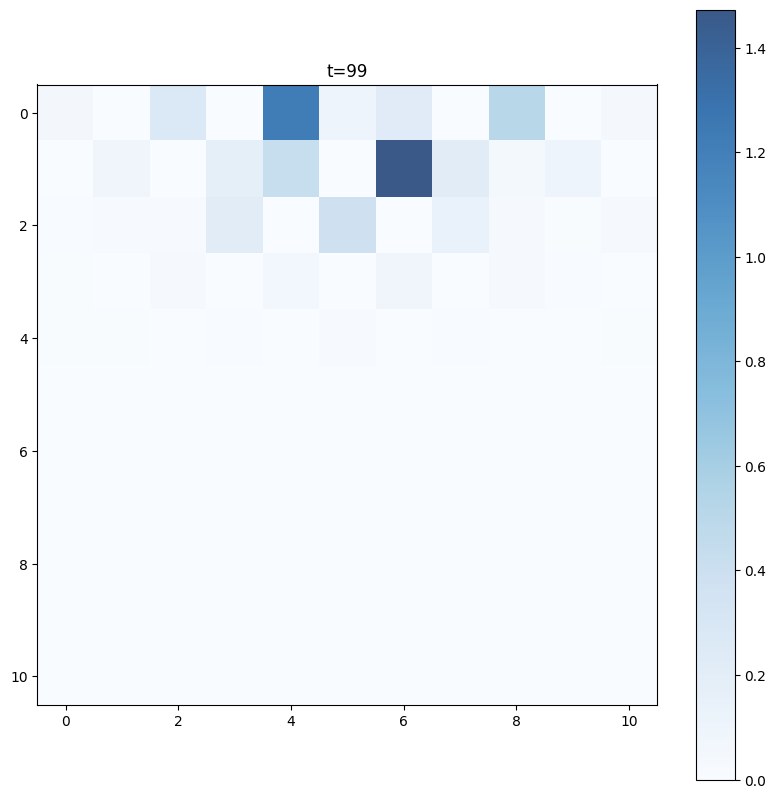

In [2]:

class RiverCA:

    step = 0
    steps = 100
    rows = 100
    cols = 100
    q, h = 0,1


    q_source = 1

    def __init__(self, rows, cols, h_top, steps):

        self.steps = steps
        self.rows = rows
        self.cols = cols
        self.h_top = h_top

        self.grid = np.zeros([steps, rows, cols, 2])


        gradient = np.linspace(h_top, 0, rows)
        for i in range(rows):
            self.grid[:, i, :, 1] = gradient[i]

        self.enforce_boundary()
        self.step =0
        

    def enforce_boundary(self):

        #remove water from sides
        # self.grid[:, 0, 0] = 0
        # self.grid[:, -1, 0] = 0
        # self.grid[0, :, 0] = 0
        self.grid[self.step, -1, :, 0] = 0


        start_row = 0
        start_col = (self.cols - 1) // 2  # Center the blob horizontally

        self.grid[self.step, start_row, start_col, 0] = self.q_source  # Fill with water
        # self.grid[self.step, start_row, start_col+1, 0] = self.q_source  # Fill with water



    def apply_rule(self, i, j):
        current_water = self.grid[self.step, i, j, 0]
        current_sediment = self.grid[self.step, i, j, 1]
        current_total = current_water + current_sediment
        # current_total = current_sediment

        neighbors = []
        for di, dj in [(0, -1), (0, 1), (1, 0), (-1, 0)]:  # Left, right, down, up
            ni, nj = i + di, j + dj
            if 0 <= ni < rows and 0 <= nj < cols:
                # neighbors.append(self.total[ni, nj])
                neighbors.append((ni, nj, current_total - (self.grid[self.step, ni, nj, 1] + self.grid[self.step, ni, nj, 0])))

        positive_slope_neighbors = [elem for elem in neighbors if elem[2] > 0]
        # zero_slopes = [slope for slope in slopes if slope == 0]
        n = 0.5  # Exponent for slope calculation

        if positive_slope_neighbors:
            # Route water based on positive slopes
            total_positive_slope = sum(elem[2]**n for elem in positive_slope_neighbors)

            for k, (i, j, slope) in enumerate(positive_slope_neighbors):
                if slope > 0:
                    proportion = (slope**n) / total_positive_slope
                    # print(proportion)
                    discharge = current_water * proportion
                    self.grid[self.step + 1, i,j, 0] += discharge
                    # current_water -= discharge

        # no negative flows
        assert np.min(self.grid[self.step, :,:,0]) >= 0




    def update_grid(self):
        print(self.step, 'a')
        assert self.step < self.steps-1
        self.enforce_boundary()
        for i in range(self.rows):
            for j in range(self.cols):
                self.apply_rule(i, j)
        

        self.enforce_boundary()
        self.total = self.grid[:, :, 0] + self.grid[:, :, 1]



    def run_simulation(self):
        frames = []  # Store frames for video

        for step in range(self.steps -1):
            self.step = step
            self.update_grid()

            # Create a frame for the video (water dynamics layer)
            # frame = (self.grid[:, :, 0] / np.max(self.grid[:, :, 0]) * 255).astype(np.uint8)
            # frame_color = cv2.applyColorMap(frame, cv2.COLORMAP_JET)  # Add colormap
            # frame = self.grid.copy() 
            # # frame_color = cv2.applyColorMap(frame, cv2.COLORMAP_JET)  # Add colormap
            # frames.append(frame)

        # Save all frames as a video
        # height, width, _ = frames[0].shape
        # out = cv2.VideoWriter(output_file, cv2.VideoWriter_fourcc(*'mp4v'), 10, (width, height))
        



        for step in range(self.steps):
            plt.figure(figsize=[10,10])
            # plt.imshow(frame[:,:,1], cmap='grey')
            plt.imshow(self.grid[step, :,:,0], cmap='Blues', alpha=0.8)
            plt.colorbar()
            plt.title('t={}'.format(step))
            plt.show()
            sleep(0.1)
            clear_output(wait=True)
            # out.write(frame)
        # out.release()
        # print(f"Simulation saved to {output_file}")



steps = 100
rows = 11
cols = 11
q, h = 0,1

h_top = 0

q_source = 1
# output_file = 'videos/water_simulation.mp4'  # Output video file
ca = RiverCA(rows, cols, h_top, steps)
ca.run_simulation()


